<a href="https://colab.research.google.com/github/jespimentel/covid_vacinacao_evolucao/blob/main/Covid_vacinacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Covid-19 - Vacinação e evolução da doença**

## **DataSUS e SEADE SP**

@jespimentel




Instruções:

1) Copie os links com os dados atualizados do DataSUS e do SEADE na célula dos paths;

2) Rode as células na sequência;

3) O programa gravará um arquivo 'csv' com a relação dos vacinados no município selecionado e uma planilha Excel ('xlsx') com os agrupamentos feitos pelo script.

Fontes dos dados

Vacinação: https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao

Ocupação hospitalar: https://opendatasus.saude.gov.br/dataset/registro-de-ocupacao-hospitalar

Casos e óbitos: https://www.seade.gov.br/coronavirus/

In [1]:
# Vacinação (DataSUS - por Estado)
path = "https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-04-20/uf%3DSP/part-00000-54596d73-9424-4bb0-a2f2-927312f01533.c000.csv"

# Ocupação hospitalar (DataSUS)
path1 = "https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/Leitos/2021-04-20/esus-vepi.LeitoOcupacao.csv"

# Leitos e internações (SEADE - SP)
path2 = 'https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/plano_sp_leitos_internacoes_serie_nova_variacao_semanal.csv'

# Casos e óbitos (SEADE - SP)
path3 = 'https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
# Vacinação SP (DataSUS)
vacinados_sp = pd.read_csv(path, sep=";", error_bad_lines=False, index_col='vacina_dataAplicacao', 
                           parse_dates=['vacina_dataAplicacao', 'paciente_dataNascimento','data_importacao_rnds'])
vacinados_sp = vacinados_sp.sort_index()

In [4]:
# Ocupação Hospitalar (DataSUS)
ocupacao = pd.read_csv(path1, sep=",", error_bad_lines=False, index_col='dataNotificacao', 
                       parse_dates=['dataNotificacao', '_created_at', '_updated_at'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Leitos e internações (SEADE - SP)
leitos_internacoes = pd.read_csv(path2, sep = ';', error_bad_lines=False, 
                                 parse_dates=['datahora'], index_col='datahora')

In [6]:
# Casos e óbitos (SEADE - SP)
casos_obitos = pd.read_csv(path3, sep = ';', error_bad_lines=False, 
                           parse_dates=['datahora'], index_col='datahora')

## Seleção

In [63]:
# Critérios de seleção
'''
codigo_ibge = 355030
municipio = 'São Paulo'
drs = 'DRS 01 Grande São Paulo'
'''

"\ncodigo_ibge = 355030\nmunicipio = 'São Paulo'\ndrs = 'DRS 01 Grande São Paulo'\n"

In [64]:
# Opcionalmente
codigo_ibge = 353870
municipio = 'Piracicaba'
drs = 'DRS 10 Piracicaba'

In [65]:
# Vacinados no município (seleção pelo código do IBGE)
criterio = vacinados_sp['estabelecimento_municipio_codigo'] == codigo_ibge
vacinados_municipio = vacinados_sp[criterio]
vacinados_municipio.index = pd.to_datetime(vacinados_municipio.index.strftime('%d/%m/%Y'), dayfirst=True)
vacinados_municipio.sample(5)

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
vacina_dataAplicacao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-17,79cf4b1d-a08c-4347-8bc8-70cc5183f725-i0b0,f7eb1a44e60505b9088b0e9a2142ec0423e8344abcc637...,72,1948-05-09,M,1,BRANCA,353870.0,10.0,PIRACICABA,BRASIL,SP,13403.0,B,7526768,PREFEITURA DO MUNICIPIO DE PIRACICABA,UNIDADE DE SAUDE DA FAMILIA JARDIM PRIMAVERA P...,353870,PIRACICABA,SP,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210123,SINOVAC,NaN,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,VACIVIDA,2021-04-17 03:00:00,18262
2021-04-13,383f82fd-d345-4693-95ac-852151cbae49-i0b0,9ef970fb9574b63b408a33baeef4c3e850c3382eb6836c...,51,1970-02-22,F,1,BRANCA,353870.0,10.0,PIRACICABA,BRASIL,SP,13405.0,B,3056910,PREFEITURA DO MUNICIPIO DE PIRACICABA,UNIDADE DE SAUDE DA FAMILIA BOA ESPERANCA I PI...,353870,PIRACICABA,SP,801,Ensino Básico,8.0,Trabalhadores da Educação,210108,SINOVAC,NaN,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,VACIVIDA,2021-04-13 03:00:00,18262
2021-04-01,5b933855-9fa4-4487-99f2-117aaa607d5f-i0b0,3b123fe9f4dbbf3aa5147829075bed19441a5c9a4c8c4a...,70,1951-02-14,F,1,BRANCA,353870.0,10.0,PIRACICABA,BRASIL,SP,13402.0,B,2096609,PREFEITURA MUNICIPAL DE PIRACICABA,UNIDADE BASICA DE SAUDE NOVO HORIZONTE PIRACICABA,353870,PIRACICABA,SP,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210079,SINOVAC,NaN,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,VACIVIDA,2021-04-01 03:00:00,18262
2021-03-10,7012f15a-752c-483a-851a-2d1dca4c5159-i0b0,a36ccded49bd1ae099b6033cfd88bafb55ba03d292fc2f...,78,1942-05-26,F,1,BRANCA,353870.0,10.0,PIRACICABA,BRASIL,SP,13420.0,B,3056821,PREFEITURA DO MUNICIPIO DE PIRACICABA,UNIDADE DE SAUDE DA FAMILIA CHAPADAO I PIRACICABA,353870,PIRACICABA,SP,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,210051,Sinovac,NaN,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,VACIVIDA,2021-03-10 03:00:00,18262
2021-02-03,747098ba-a588-48dc-ba04-438fd345cd7c-i0b0,fb2f711ad5704c965a9e0fbe77ac88a8dc6391d075c53e...,37,1983-04-28,F,4,AMARELA,354400.0,10.0,RIO DAS PEDRAS,BRASIL,SP,13398.0,B,2772310,IRMANDADE DA SANTA CASA DE MISERICORDIA DE PIR...,SANTA CASA DE PIRACICABA,353870,PIRACICABA,SP,926,Outros,9.0,Trabalhadores de Saúde,4120Z005,AstraZeneca/Oxford,NaN,1ª Dose,85,Vacina Covid-19 - Covishield,VACIVIDA,2021-02-03 15:02:00,18262


In [66]:
# Opcinalmente, gere arquivo 'csv' com a relação dos vacinados no município
# vacinados_municipio.to_csv('{}.csv'.format(municipio))

In [67]:
doses = vacinados_municipio.groupby('vacina_descricao_dose')['document_id'].count()
doses

vacina_descricao_dose
    1ª Dose    51837
    2ª Dose    24854
Name: document_id, dtype: int64

In [68]:
# Idade dos vacinados (1a. e 2a. doses)
describe = vacinados_municipio['paciente_idade'].describe()
describe

count    76691.000000
mean        65.351397
std         18.816355
min          4.000000
25%         52.000000
50%         72.000000
75%         78.000000
max        121.000000
Name: paciente_idade, dtype: float64

In [69]:
# Quantidade de pessoas vacinadas por local, sexo e sistema de origem 
vacinados_por_local = vacinados_municipio.groupby(['estalecimento_noFantasia', 'paciente_enumSexoBiologico', 'sistema_origem'])['paciente_id'].count()
vacinados_por_local

estalecimento_noFantasia                           paciente_enumSexoBiologico  sistema_origem
CENTRO DE DETENCAO PROVISORIA DE PIRACICABA        F                           VACIVIDA            13
                                                   M                           VACIVIDA           122
CENTRO DE RESSOCIALIZACAO DE PIRACICABA            F                           VACIVIDA            13
                                                   M                           VACIVIDA             7
HOSPITAL DOS FORNECEDORES DE CANA DE PIRACICABA    F                           VACIVIDA          1324
                                                                                                 ... 
UNIDADE SAUDE DA FAMILIA SANTA ROSA II PIRACICABA  M                           VACIVIDA           353
UNIDADE SAUDE DA FAMILIA SAO JOSE PIRACICABA       F                           VACIVIDA           128
                                                   M                           VACIVIDA   

In [70]:
# Número de vacinados por semana
vacinados_municipio_por_semana = vacinados_municipio[['paciente_id']].resample('W').count()
vacinados_municipio_por_semana

,paciente_id
vacina_dataAplicacao,
2021-01-24,536
2021-01-31,3478
2021-02-07,5465
2021-02-14,4199
2021-02-21,5059
2021-02-28,1753
2021-03-07,8918
2021-03-14,6543
2021-03-21,5284


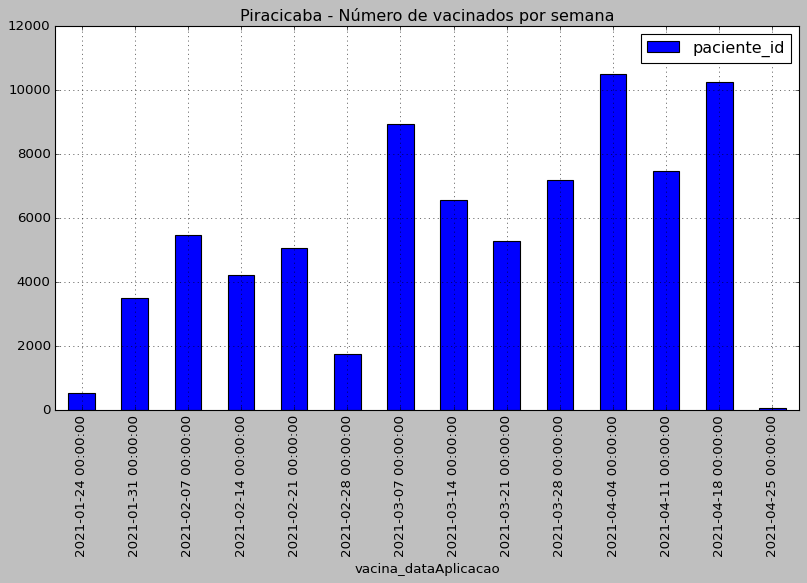

In [71]:
graf_vacinados_semana = vacinados_municipio_por_semana.plot.bar(figsize=(12,6))

# Gráfico: Vacinados por semana
vacinados_municipio_por_semana = vacinados_municipio['document_id'].resample('w', closed='left').count()
nome_do_grafico = '{} - Número de vacinados por semana'.format(municipio)
plt.style.use ('classic')
plt.grid()
plt.title (nome_do_grafico)
graf_vacinados_semana
plt.savefig(nome_do_grafico+'.png', dpi = 300, bbox_inches='tight')
plt.show()

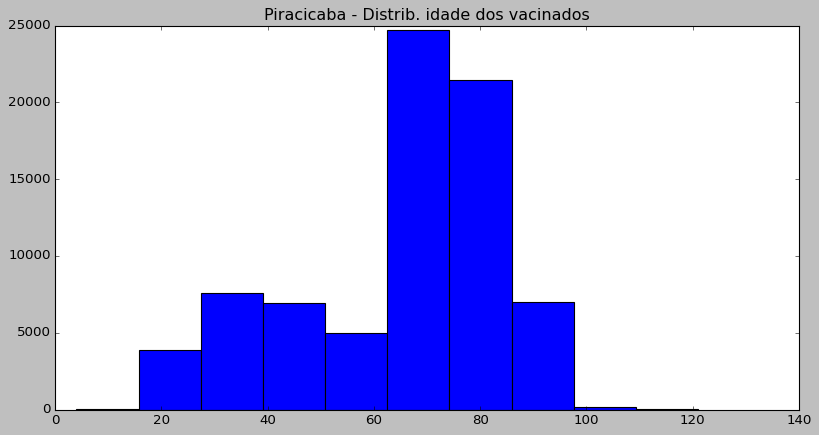

In [72]:
hist_idade = vacinados_municipio['paciente_idade'].hist(figsize=(12,6))

# Histograma: idade dos vacinados
nome_do_grafico = '{} - Distrib. idade dos vacinados'.format(municipio)
plt.style.use ('classic')
plt.grid()
plt.title (nome_do_grafico)
hist_idade
plt.savefig(nome_do_grafico+'.png', dpi = 300, bbox_inches='tight')
plt.show()

In [73]:
# Ocupação no município - DataSUS
criterio = ocupacao ['municipioNotificacao'] == municipio
ocupacao_municipio = ocupacao[criterio]
ocupacao_municipio.index = pd.to_datetime(ocupacao_municipio.index.strftime('%d/%m/%Y'), dayfirst=True)
ocupacao_municipio = ocupacao_municipio.sort_index()

In [74]:
ocupacao_municipio = ocupacao_municipio[['cnes', 'ocupacaoConfirmadoCli', 'ocupacaoConfirmadoUti']]
ocupacao_municipio.tail(9)

,cnes,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti
dataNotificacao,,,
2021-04-13,2087057,11.0,19.0
2021-04-14,2772310,21.0,25.0
2021-04-14,2087057,10.0,21.0
2021-04-14,9425802,18.0,39.0
2021-04-14,2792346,32.0,12.0
2021-04-15,2087057,10.0,22.0
2021-04-15,9425802,21.0,39.0
2021-04-15,2772310,19.0,24.0
2021-04-15,2792346,31.0,15.0


In [75]:
ocupacao_por_estabelecimento = ocupacao_municipio.groupby([ocupacao_municipio.index, 'cnes'])[['ocupacaoConfirmadoCli','ocupacaoConfirmadoUti']].sum()
ocupacao_por_estabelecimento.tail(9)

ocupacaoConfirmadoCli  ocupacaoConfirmadoUti
dataNotificacao cnes                                                   
2021-04-13      9425802.0                   19.0                   40.0
2021-04-14      2087057.0                   10.0                   21.0
                2772310.0                   21.0                   25.0
                2792346                     32.0                   12.0
                9425802.0                   18.0                   39.0
2021-04-15      2087057.0                   10.0                   22.0
                2772310.0                   19.0                   24.0
                2792346                     31.0                   15.0
                9425802.0                   21.0                   39.0

In [76]:
ocupacao_grouped = ocupacao_municipio.groupby([ocupacao_municipio.index])['ocupacaoConfirmadoCli',
                                                                          'ocupacaoConfirmadoUti'].sum()
ocupacao_grouped.tail(9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti
dataNotificacao,,
2021-04-07,88.0,116.0
2021-04-08,96.0,113.0
2021-04-09,108.0,109.0
2021-04-10,97.0,94.0
2021-04-11,97.0,103.0
2021-04-12,99.0,98.0
2021-04-13,95.0,98.0
2021-04-14,81.0,97.0
2021-04-15,81.0,100.0


In [77]:
ocupacao_media_semana = ocupacao_grouped[['ocupacaoConfirmadoCli', 'ocupacaoConfirmadoUti']].resample('W').mean()
ocupacao_media_semana.tail(9)

,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti
dataNotificacao,,
2021-02-21,34.000000,54.285714
2021-02-28,44.571429,54.142857
2021-03-07,51.857143,66.000000
2021-03-14,67.000000,75.142857
2021-03-21,82.166667,94.166667
2021-03-28,108.857143,108.714286
2021-04-04,110.428571,116.142857
2021-04-11,97.000000,109.142857
2021-04-18,89.000000,98.250000


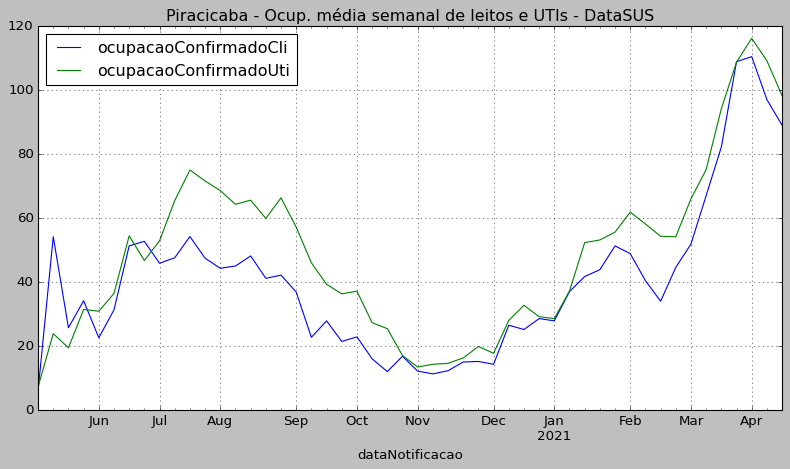

In [78]:
graf_ocupacao_media_DataSUS = ocupacao_media_semana.plot(figsize=(12,6))

# Gráfico: ocupação média semanal - DataSUS
nome_do_grafico = '{} - Ocup. média semanal de leitos e UTIs - DataSUS'.format(municipio)
plt.style.use ('classic')
plt.grid()
plt.title (nome_do_grafico)
graf_ocupacao_media_DataSUS
plt.savefig(nome_do_grafico+'.png', dpi = 300, bbox_inches='tight')
plt.show()

## **Seade SP**

In [79]:
leitos_internacoes.sample(5)

,nome_drs,pacientes_uti_mm7d,total_covid_uti_mm7d,ocupacao_leitos,pop,leitos_pc,internacoes_7d,internacoes_7d_l,internacoes_7v7,pacientes_uti_ultimo_dia,total_covid_uti_ultimo_dia,ocupacao_leitos_ultimo_dia,internacoes_ultimo_dia,pacientes_enf_mm7d,total_covid_enf_mm7d,pacientes_enf_ultimo_dia,total_covid_enf_ultimo_dia
datahora,,,,,,,,,,,,,,,,,
2021-03-01,DRS 06 Bauru,"254,86","267,00","95,45",1741281,"15,33",582,563,"3,37",269,276,"97,46",63,"437,00","625,14",449,635
2021-04-20,DRS 08 Franca,"131,29","149,71","87,70",696336,"21,50",217,201,"7,96",131,148,"88,51",23,"150,57","230,71",138,226
2021-01-19,DRS 07 Campinas,"507,29","715,43","70,91",4562125,"15,68",949,932,"1,82",531,730,"72,74",131,"598,86","1176,43",565,1186
2021-02-08,Estado de São Paulo,"5985,71","8953,71","66,85",44639899,"20,06",10487,10724,"-2,21",5982,9045,"66,14",1209,"6996,00","14577,00",6837,14547
2021-04-05,DRS 09 Marília,"234,14","244,86","95,62",1109670,"22,07",544,494,"10,12",236,247,"95,55",70,"422,57","558,43",431,541


In [80]:
# Seleciona DRS
criterio = leitos_internacoes['nome_drs'] == drs
leitos_internacoes_drs = leitos_internacoes[criterio]

In [81]:
internacoes_diarias = leitos_internacoes_drs[['pacientes_uti_ultimo_dia', 'internacoes_ultimo_dia']]
internacoes_diarias

,pacientes_uti_ultimo_dia,internacoes_ultimo_dia
datahora,,
2020-10-08,79,24
2020-10-09,83,28
2020-10-10,72,27
2020-10-11,67,15
2020-10-12,71,11
...,...,...
2021-04-17,366,101
2021-04-18,344,76
2021-04-19,340,86


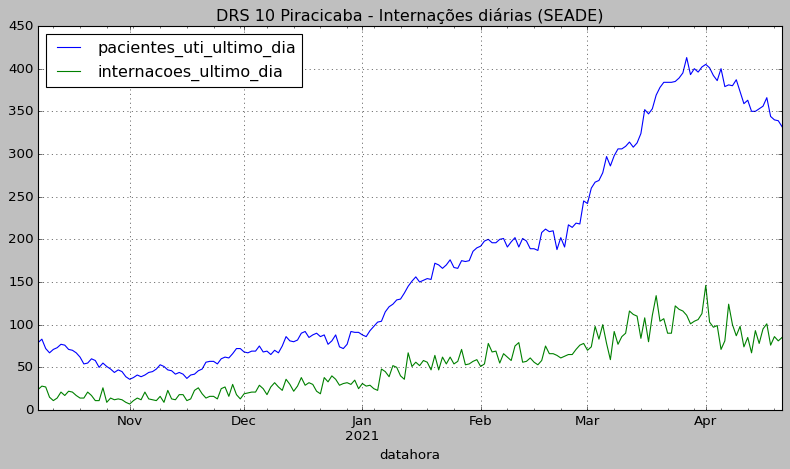

In [82]:
graf_internacoes_drs = internacoes_diarias.plot(figsize=(12,6))

# Gráfico: Internações diárias - DRS (SEADE)
nome_do_grafico = '{} - Internações diárias (SEADE)'.format(drs)
plt.style.use ('classic')
plt.grid()
plt.title (nome_do_grafico)
graf_internacoes_drs
plt.savefig(nome_do_grafico+'.png', dpi = 300, bbox_inches='tight')
plt.show()

In [83]:
casos_obitos.sample(5)

,nome_munic,codigo_ibge,dia,mes,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
datahora,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-23,Ribeirão Bonito,3542909,23,7,34,2,"2,623659e+02","1,1428571",0,0,"0,000000e+00","0,0000000","0,0000000000",RA Central,5,Araraquara,8,12959,1890,47155,<50,7.0,"-22,0685","-48,1820",30
2021-02-23,Amparo,3501905,23,2,2743,10,"3,938885e+03","5,8571429",53,0,"7,610678e+01","0,5714286","0,0193219103",RA de Campinas,4,Campinas,3,69639,12727,44532,<5000,2.0,"-22,7088","-46,7720",8
2020-05-20,Santa Cruz do Rio Pardo,3546405,20,5,51,1,"1,106051e+02","2,0000000",1,1,"2,168727e+00","0,1428571","0,0196078431",RA de Marília,8,Marília,5,46110,8329,111475,<150,6.0,"-22,8988","-49,6354",21
2021-01-20,Estrela d'Oeste,3515202,20,1,650,2,"8,030640e+03","2,1428571",14,0,"1,729676e+02","0,0000000","0,0215384615",RA de São José do Rio Preto,14,São José do Rio Preto,15,8094,1685,29628,<1200,3.0,"-20,2875","-50,4049",3
2020-11-16,Socorro,3552106,16,11,645,0,"1,663100e+03","9,0000000",9,0,"2,320604e+01","0,0000000","0,0139534884",RA de Campinas,4,Campinas,3,38783,7970,44903,<1200,3.0,"-22,5903","-46,5251",47


In [84]:
# Seleciona município
criterio = casos_obitos['nome_munic'] == municipio
casos_locais = casos_obitos[criterio]
casos_locais.tail(1)

,nome_munic,codigo_ibge,dia,mes,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
datahora,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-21,Piracicaba,3538709,21,4,41115,169,"1,054574e+04","161,7142857",791,7,"2,028866e+02","5,8571429","0,0192387207",RA de Campinas,4,Piracicaba,11,389873,64835,137807,>5000,1.0,"-22,7338","-47,6476",16


In [85]:
casos_locais_selecionados = casos_locais[['nome_munic', 'casos', 'obitos', 'casos_novos', 'obitos_novos']]
casos_locais_selecionados

,nome_munic,casos,obitos,casos_novos,obitos_novos
datahora,,,,,
2020-02-25,Piracicaba,0,0,0,0
2020-02-26,Piracicaba,0,0,0,0
2020-02-27,Piracicaba,0,0,0,0
2020-02-28,Piracicaba,0,0,0,0
2020-02-29,Piracicaba,0,0,0,0
...,...,...,...,...,...
2021-04-17,Piracicaba,40498,768,141,6
2021-04-18,Piracicaba,40641,774,143,6
2021-04-19,Piracicaba,40729,776,88,2


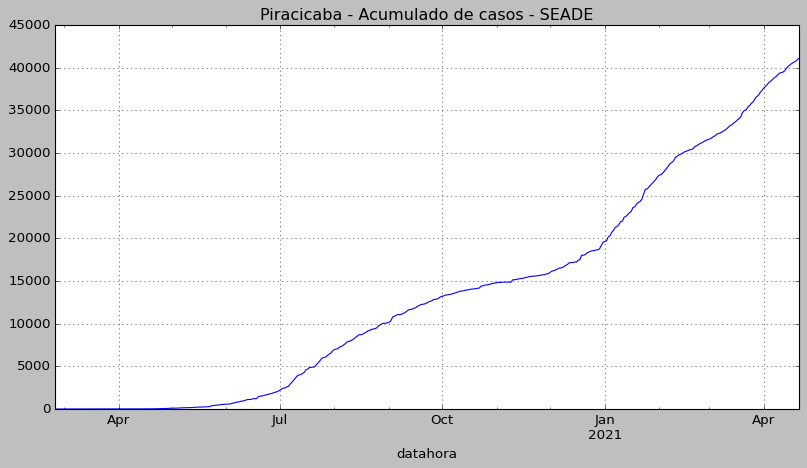

In [86]:
graf_casos_locais = casos_locais_selecionados['casos'].plot(figsize=(12,6))

# Gráfico: Acumulado de casos locais
nome_do_grafico = '{} - Acumulado de casos - SEADE'.format(municipio)
plt.style.use ('classic')
plt.grid()
plt.title (nome_do_grafico)
graf_casos_locais
plt.savefig(nome_do_grafico+'.png', dpi = 300, bbox_inches='tight')
plt.show()

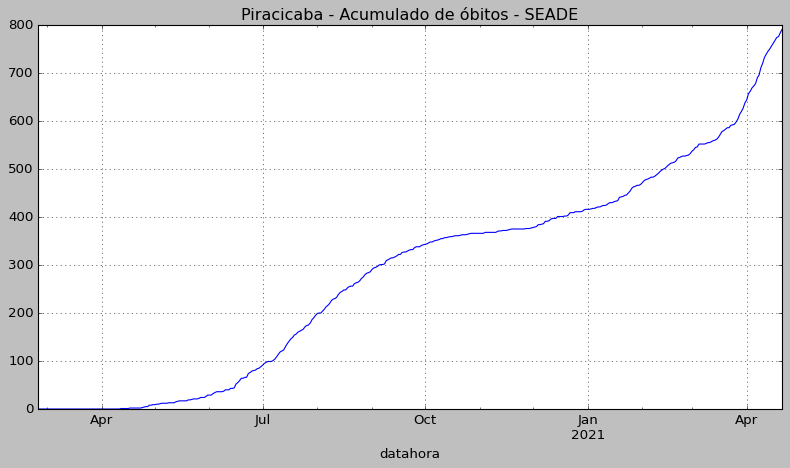

In [87]:
graf_obitos_locais = casos_locais_selecionados['obitos'].plot(figsize=(12,6))

# Gráfico: Acumulado de óbitos locais
nome_do_grafico = '{} - Acumulado de óbitos - SEADE'.format(municipio)
plt.style.use ('classic')
plt.grid()
plt.title (nome_do_grafico)
graf_casos_locais
plt.savefig(nome_do_grafico+'.png', dpi = 300, bbox_inches='tight')
plt.show()

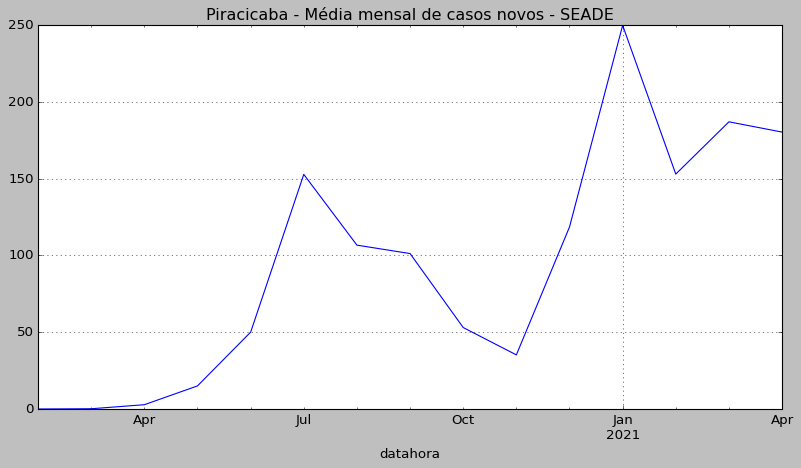

In [88]:
graf_media_mensal_casos = casos_locais_selecionados['casos_novos'].resample('M').mean().plot(figsize=(12,6))

# Gráfico: Média mensal de casos novos
nome_do_grafico = '{} - Média mensal de casos novos - SEADE'.format(municipio)
plt.style.use ('classic')
plt.grid()
plt.title (nome_do_grafico)
graf_media_mensal_casos
plt.savefig(nome_do_grafico+'.png', dpi = 300, bbox_inches='tight')
plt.show()

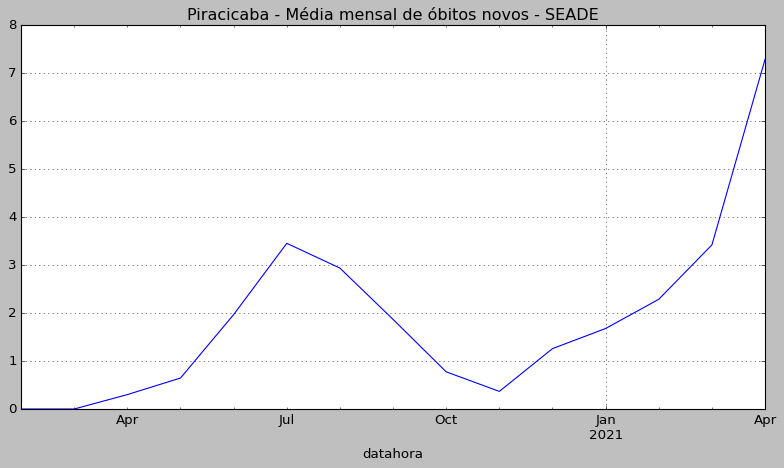

In [89]:
graf_media_mensal_obitos = casos_locais_selecionados['obitos_novos'].resample('M').mean().plot(figsize=(12,6))

# Gráfico: Média mensal de óbitos novos
nome_do_grafico = '{} - Média mensal de óbitos novos - SEADE'.format(municipio)
plt.style.use ('classic')
plt.grid()
plt.title (nome_do_grafico)
graf_media_mensal_casos
plt.savefig(nome_do_grafico+'.png', dpi = 300, bbox_inches='tight')
plt.show()

In [90]:
# Criação de uma planilha Excel para resumir o trabalho
with pd.ExcelWriter('{}_{}.xlsx'.format(municipio, drs)) as writer:  
  doses.to_excel(writer, sheet_name='Doses')
  vacinados_por_local.to_excel(writer, sheet_name='Vacinados por local')
  vacinados_municipio_por_semana.to_excel (writer, sheet_name='Vacinados por semana')
  ocupacao_por_estabelecimento.to_excel (writer, sheet_name= 'Ocupação Leitos e UTI - DataSUS')
  internacoes_diarias.to_excel (writer, sheet_name= 'Internações diárias - SEADE')
  casos_locais_selecionados.to_excel (writer, sheet_name= 'Casos locais - SEADE')